In [2]:
import pandas as pd
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
fraud_data = pd.read_csv('fraud_data.csv')

In [5]:
fraud_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


In [7]:
fraud_data.isFraud.value_counts()

0    57049
1     2005
Name: isFraud, dtype: int64

In [8]:
fraud_data.isFraud.value_counts() / len(fraud_data) * 100 # Gets percentage of unique values

0    96.604802
1     3.395198
Name: isFraud, dtype: float64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

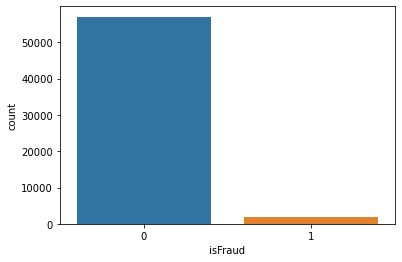

In [9]:
sns.countplot(fraud_data.isFraud) # This finds unique values graphically

Both of these methods show a clear class imbalance in isFraud.

In [10]:
fraud_data.isnull().sum() / len(fraud_data) * 100 # Finds percentage of missing data in each column

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
id_36             75.945745
id_37             75.945745
id_38             75.945745
DeviceType        75.979612
DeviceInfo        79.813391
Length: 434, dtype: float64

In [11]:
a = fraud_data.isnull().sum() > 0 # sets boolean result of missing data to a

In [12]:
a.value_counts() # Counts missing values in a

True     414
False     20
dtype: int64

This shows that 414 columns have missing values in the dataset.

In [13]:
fraud_data = fraud_data[fraud_data.columns[fraud_data.isnull().mean() < 0.2]] # discards columns that have more than 20% missing data.

In [14]:
num_cols = fraud_data.select_dtypes(include = np.number).columns # This gets all numerical columns
fraud_data[num_cols] = fraud_data[num_cols].fillna(fraud_data[num_cols].mean()) # This fills missing numerical column data with mean

In [15]:
cat_cols = fraud_data.select_dtypes(include = 'object').columns # This gets all categorical columns
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0]) # This fills missing categorical data with the mode.

In [16]:
fraud_data.isnull().sum() / len(fraud_data) * 100 # We've cleaned the data of missing values in columns.

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
                 ... 
V317              0.0
V318              0.0
V319              0.0
V320              0.0
V321              0.0
Length: 182, dtype: float64

In [17]:
fraud_data = pd.get_dummies(fraud_data, columns = cat_cols)

In [18]:
fraud_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,...,0,0,0,0,1,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,...,0,0,0,0,0,0,0,0,0,0
2,3327470,0,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,...,0,0,0,0,0,0,0,0,0,0
3,3118781,0,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,...,0,0,0,0,0,0,0,0,0,0
4,3459772,0,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
X = fraud_data.drop(columns = ['isFraud'])
Y = fraud_data.isFraud

In [21]:
# This imports sklearn and standardizes our data with a mean of 0 and standard deviation of 1
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data = scaled_features)
scaled_features.columns= X.columns

In [22]:
scaled_features.head()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,-1.688548,-1.544958,-0.468203,-0.021940,1.412632,-0.286861,0.653753,-0.225982,0.077832,-0.099186,...,-0.021387,-0.022918,-0.009202,-0.004115,2.216281,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
1,1.615662,1.681426,-0.073540,-0.406928,-1.078794,-0.286861,-0.804662,-1.144356,0.077832,-0.099186,...,-0.021387,-0.022918,-0.009202,-0.004115,-0.451206,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
2,0.266093,0.219070,-0.258976,0.585989,0.881042,2.788641,0.605139,-0.069441,-10.788933,-0.099186,...,-0.021387,-0.022918,-0.009202,-0.004115,-0.451206,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
3,-0.959645,-1.032167,1.140478,0.491581,1.188468,-0.286861,-0.099761,1.569022,0.077832,-0.099186,...,-0.021387,-0.022918,-0.009202,-0.004115,-0.451206,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
4,1.043171,1.053404,-0.438389,-0.185621,0.580022,-0.286861,0.653753,-0.278162,0.077832,-0.082944,...,-0.021387,-0.022918,-0.009202,-0.004115,2.216281,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [24]:
from sklearn.utils import resample

In [25]:
train_data = pd.concat([X_train, Y_train], axis = 1) # concatinates training data back together

In [26]:
not_fraud = train_data[train_data.isFraud == 0]
fraud = train_data[train_data.isFraud == 1]

In [27]:
fraud_upsampled = resample(fraud, replace = True, n_samples = len(not_fraud), random_state = 27)

In [29]:
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [30]:
upsampled.isFraud.value_counts()

0    39942
1    39942
Name: isFraud, dtype: int64

In [31]:
# This is downsampling
not_fraud_downsampled = resample(not_fraud, replace = False, n_samples = len(fraud), random_state = 27)

In [32]:
downsampled = pd.concat([not_fraud_downsampled, fraud])

In [33]:
downsampled.isFraud.value_counts()

0    1395
1    1395
Name: isFraud, dtype: int64